In [17]:
import matplotlib.pyplot as plt

def draw_plots(time_of_run, network_design, loss, val_loss, acc, val_acc):
    if not time_of_run and not network_design and not loss and not val_loss and not acc and not val_acc:
        return
    
    if time_of_run:
        print('Time of Run: ', time_of_run)
    if network_design:
        print('Network: ', network_design)

    plt.plot(loss, label='Train Loss')
    plt.plot(val_loss, label='Test Loss')
    plt.legend()
    plt.title('Loss')
    plt.show()

    plt.plot(acc, label='Train Accuracy')
    plt.plot(val_acc, label='Test Accuracy')
    plt.legend()
    plt.title('Accuracy')
    plt.show()

Time of Run:  2020-06-11 15:09:31.364453

Network:  I(1x64x64) => C3(64,k3) => P(2) => C3(128,k3) => P(2) => C3(256,k3) => P(2) => D(128) => max(12)



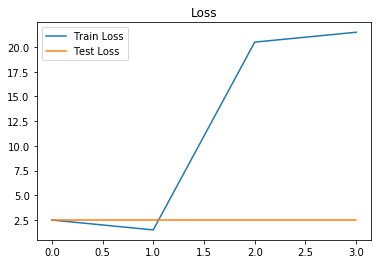

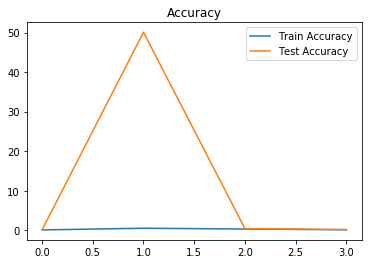

Time of Run:  2020-06-11 15:09:31.364453

Network:  I(1x64x64) => C3(64,k3) => P(2) => C3(128,k3) => P(2) => C3(256,k3) => P(2) => D(128) => max(12)



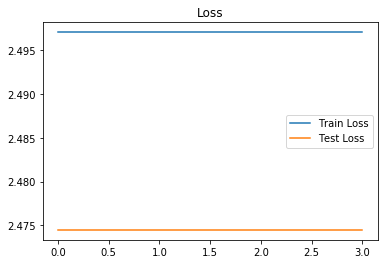

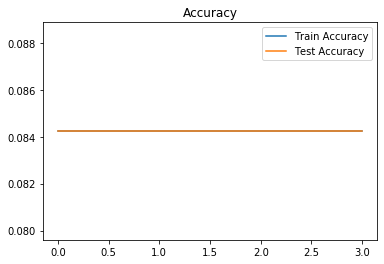

In [18]:

time_of_run = None
network_design = None
loss = []
val_loss = []
acc = []
val_acc = []

with open('./logs/results.log', 'r') as f:
    lines = f.readlines()

    for l in lines:
        if not l or l.startswith('-'):
            continue

        if l.startswith('='):
            draw_plots(time_of_run, network_design, loss, val_loss, acc, val_acc)

            time_of_run = None
            network_design = None
            loss = []
            val_loss = []
            acc = []
            val_acc = []
            continue

        elif l.startswith('New Run: '):
            time_of_run = l.replace('New Run: ', '')
        elif l.startswith('network_design: '):
            network_design = l.replace('network_design: ', '')

        elif l.startswith('loss: '):
            loss.append(float(l.replace('loss: ', '')))
        elif l.startswith('val_los: '):
            val_loss.append(float(l.replace('val_los: ', '')))
        elif l.startswith('acc: '):
            acc.append(float(l.replace('acc: ', '')))
        elif l.startswith('val_acc: '):
            val_acc.append(float(l.replace('val_acc: ', '')))
    draw_plots(time_of_run, network_design, loss, val_loss, acc, val_acc)